Visualizing the behavior of systems can be a very useful tool in decision making.  In this example, an alpha particle's trajectory is shown in the presence of a magnetic bottle:  Two dipoles333.  First, we define a function for the magentic field and then we use a simple Euler technique to find the trajectory of the alpha particle.  Then we'll use matplotlib and the mpl toolkit to visualize the trajectory. 

In [1]:
import numpy
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# define constants
m_p = 1.67E-27       # mass of proton: kg
qe = 1.602E-19        # charge of proton: C
mu0 = numpy.pi * 4.0E-7 #permeability of free space

# now, setting up an alpha particle
m = 4.0*m_p
q = 2.0*qe
QoverM = q/m  #Charge to mass ratio
dt = 1.0E-6 #small time step 

In [3]:
t = numpy.arange(0.0, 1.0, dt)  #define the time array
rp = numpy.zeros((len(t), 3))  #initialize the position array
vp = numpy.zeros((len(t), 3))  #initialize the velocity array
v0 = 100.0

# define the magnetic field
# let the magnetized object have a magnetic moment that points in the z direction
mu = 10000.0 * numpy.array([0.0, 0.0, 1.0])

We can define the magnetic field of a dipole as a function:

$B = (μ₀ / (4π)) * (3(\vec{m} ·\vec{r})\hat{r} / r³ - \vec{m} / r³)$

The function adds the magnetic field of two dipoles aligned along the z-axis, in the z-direction, and separated by a distance of $2*zdisp$.

In [4]:
def B_bot(x,y,z):
    zdisp = 10.0
    # point dipole A
    posA = numpy.array([0.0, 0.0, zdisp])
    rA = numpy.array([x,y,z]) - posA
    rmagA = numpy.sqrt(sum(rA**2))
    B1A = 3.0*rA*numpy.dot(mu,rA) / (rmagA**5)
    B2A = -1.0 * mu / (rmagA**3)
    # point dipole B
    posB = numpy.array([0.0, 0.0, -zdisp])
    rB = numpy.array([x,y,z]) - posB
    rmagB = numpy.sqrt(sum(rB**2))
    B1B = 3.0*rB*numpy.dot(mu,rB) / (rmagB**5)
    B2B = -1.0 * mu / (rmagB**3)
    return ((mu0/(4.0*numpy.pi)) * (B1A + B2A + B1B + B2B))

print("q/m: ", QoverM)
#print("Cyclotron period Init: ", 2.0*numpy.pi/(QoverM*numpy.sqrt(numpy.sum((B(0.0, -8.0, 5.0)**2))))) #One can print the cylotron frequency at different locations.
#print("Cyclotron period Other: ", 2.0*numpy.pi/(QoverM*numpy.sqrt(numpy.sum((B(0.0, -8.0, 0.0)**2)))))

q/m:  47964071.85628742


Text(0.5, 1.0, "Magnetic Field of a 'Magnetic Bottle'")

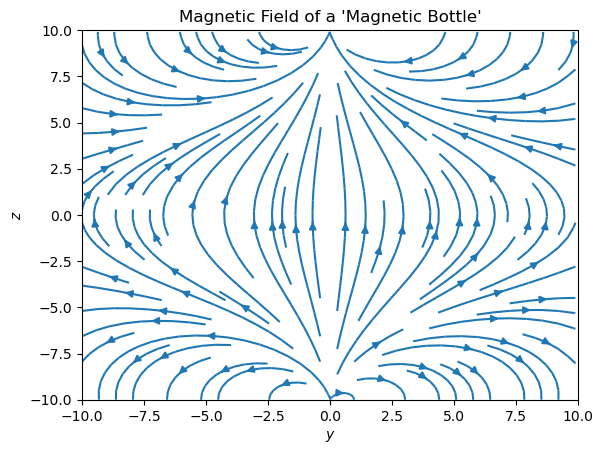

In [5]:
# plot a sample of the B field in the y-z plane
y = numpy.arange(-10.0, 10.0, .1)
z = numpy.arange(-10.0, 10.0, .1)
Y, Z = numpy.meshgrid(y,z)
ilen, jlen = numpy.shape(Y)
Bf = numpy.zeros((ilen,jlen,3))

for i in range(0, ilen):
    for j in range(0, jlen):
        Bf[i,j] = B_bot(0.0, Y[i,j], Z[i,j])
        
mpl.streamplot(Y,Z, Bf[:,:,1], Bf[:,:,2])
mpl.xlim(-10.0,10.0)
mpl.ylim(-10.0,10.0)
mpl.xlabel("$y$")
mpl.ylabel("$z$")
mpl.title("Magnetic Field of a 'Magnetic Bottle'")

Here we set the initial contitions for the particle.  Note the initial velocity is entirely in the z-direction.  The loop is a simple Euler solver with an emperical time step dt.

In [6]:

rp[0,:] = numpy.array([0.0, -5.0, 0.0])
vp[0,:] = numpy.array([0.0, 0.0, v0])

# Euler time steps
for it in range(0, len(t)-1):
    Bp = B_bot(rp[it,0], rp[it, 1], rp[it,2])
    Ap = QoverM * numpy.cross(vp[it,:], Bp)
    vp[it+1] = vp[it] + dt*Ap
    rp[it+1] = rp[it] + dt*vp[it]
    if (numpy.sqrt(numpy.sum(rp[it+1]**2)) > 20.0):
        break

In [7]:
# Parameters for plot attributes
mpl.rc("xtick", labelsize="large")
mpl.rc("ytick", labelsize="large")
mpl.rc("axes", labelsize="xx-large")
mpl.rc("axes", titlesize="xx-large")
mpl.rc("figure", figsize=(8,8))

y = numpy.arange(-10.0, 10.0, .1)
z = numpy.arange(-10.0, 10.0, .1)
Y, Z = numpy.meshgrid(y,z)
ilen, jlen = numpy.shape(Y)
Bf = numpy.zeros((ilen,jlen,3))




Text(0.5, 1.0, "Trajectory of Alpha Particle in a 'Magnetic Bottle'")

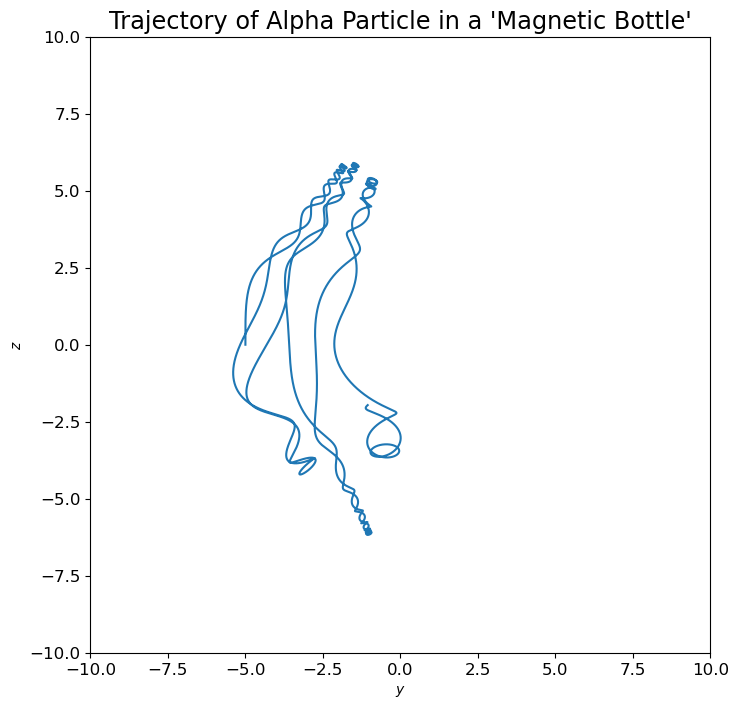

In [8]:
mpl.streamplot(Y,Z, Bf[:,:,1], Bf[:,:,2], color="black")
mpl.plot(rp[:,1], rp[:,2])
mpl.xlim(-10.0,10.0)
mpl.ylim(-10.0,10.0)
mpl.xlabel("$y$")
mpl.ylabel("$z$")
mpl.title("Trajectory of Alpha Particle in a 'Magnetic Bottle'")

While the trajectory is complicated the overall motion is fairly constrained due to the cross-product deflection and the bottle.